## Regression in Python

https://realpython.com/linear-regression-in-python/

In [1]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up some x values.
x = np.arange(0.0, 10.1, 0.5)  
                                # linspace is also very applicable
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [4]:
len(x)

21

In [46]:
y = 5.0 * x + 2.0
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5, 52. ])

In [47]:
np.polyfit(x, y, 1)

array([5., 2.])

In [39]:
# Let's add error like what typically is the case in the real world:

# Create y - note numpy's element-wise operations. Takes each individual element in the x array and multiplies by 5 (in this case)
# Equation of a line: and add in the epsilon (error) via numpy normal distribution
y = 5.0 * x + 2.0 + np.random.normal(0.0, 1.0, len(x)) # Here, m is 5, and c is 2

In [40]:
y

array([ 3.96562032,  3.005382  ,  6.46740466,  8.51626656, 12.0369296 ,
       16.8711562 , 14.83830288, 19.91493782, 24.93699349, 24.4416437 ,
       27.35822193, 29.13688742, 29.19774043, 35.31440177, 36.31507936,
       39.41210619, 41.09010785, 43.80774059, 48.00288136, 49.59513067,
       52.26544188])

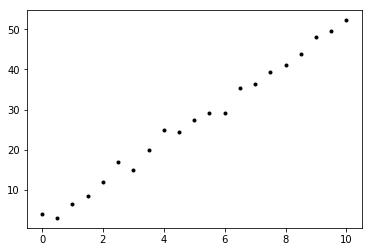

In [41]:
# Plot x versus y.
plt.plot(x, y, 'k.') # the third argument in plot takes the plotting point aesthetics

What would this line be if we didn't know the "equation of the line"?

In [48]:
# All you need is any 2 of theses points
# Let's look at a polynomial fit using NumPy

# Do regression on the x and y arrays using numpy. Least squares fitting.
np.polyfit(x, y, 1) # third argument is the deg argument?

# Thus, polyfit is telling us the best way to get y from x is for the first constant to by 5 and the second constant to be 2
# Best way to describe the relationship between x and y: It is saying if you take x, multiply it by 5 and add 2, you'll get the values for y  
# It essentially is reverse engneering

array([5., 2.])

In [49]:
# Here it is proven:
np.polyfit(x[0:2], y[0:2], 1) # start at 0th element up to 2nd in each array

array([5., 2.])

In [26]:
# Thus, if we just give polyfit only 2 pairs it will tell you 

***
$$ y = m x + c $$

m is the slope, c the y-intercept
***
But what about real world error? Model for my regression:

$$ y =  m x + c + \epsilon $$

epsilon$$\epsilon$$ 

is usually a random variable could be 0 or next could be 0.01 etc (tricky to measure). Epsilon represents **error** i.e. things we can't measure. It is the error in our measuring the relationship between x and y. Ideally we want 0 error. It exists in the real world. We never know the **m** and the **c** beforehand.

In [28]:
# Create a y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))